In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Attention, Input, SimpleRNN, TimeDistributed
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = r'C:\Users\Rohit Srivastava\OneDrive\Desktop\DL dataset\2\SPAM text message 20170820 - Data.csv'
spam_data = pd.read_csv(file_path)

In [3]:
spam_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
# Data Exploration and Preprocessing
print("Dataset Information:")
print(spam_data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [5]:
# Check for missing values
print("\nMissing Values:")
print(spam_data.isnull().sum())


Missing Values:
Category    0
Message     0
dtype: int64


In [6]:
# Count the number of ham and spam messages
print("\nMessage Counts by Category:")
print(spam_data['Category'].value_counts())


Message Counts by Category:
ham     4825
spam     747
Name: Category, dtype: int64


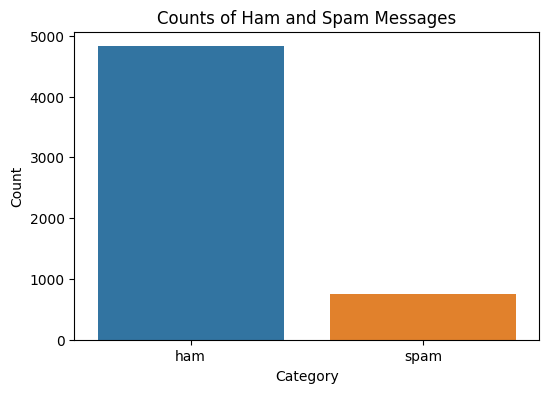

In [7]:
# Visualize the counts of ham and spam messages
plt.figure(figsize=(6, 4))
sns.countplot(data=spam_data, x='Category')
plt.title('Counts of Ham and Spam Messages')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [8]:
# Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(spam_data['Message'])
X = tokenizer.texts_to_sequences(spam_data['Message'])
X = pad_sequences(X)
y = (spam_data['Category'] == 'spam').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Build an RNN model with Attention using the functional API
input_layer = Input(shape=(X.shape[1],))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=X.shape[1])(input_layer)
rnn_layer, state_h, state_c = LSTM(32, return_sequences=True, return_state=True)(embedding_layer)
attention_output = Attention(name='attention')([state_h, rnn_layer])
output_layer = Dense(1, activation='sigmoid')(attention_output)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
56/56 [==============================] - 7s 84ms/step - loss: 0.4298 - accuracy: 0.8539 - val_loss: 0.4104 - val_accuracy: 0.8576
Epoch 2/5
56/56 [==============================] - 4s 73ms/step - loss: 0.3909 - accuracy: 0.8679 - val_loss: 0.4073 - val_accuracy: 0.8576
Epoch 3/5
56/56 [==============================] - 4s 70ms/step - loss: 0.3895 - accuracy: 0.8679 - val_loss: 0.4100 - val_accuracy: 0.8576
Epoch 4/5
56/56 [==============================] - 4s 73ms/step - loss: 0.3893 - accuracy: 0.8679 - val_loss: 0.4056 - val_accuracy: 0.8576
Epoch 5/5
56/56 [==============================] - 4s 76ms/step - loss: 0.3877 - accuracy: 0.8679 - val_loss: 0.4050 - val_accuracy: 0.8576


In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model - Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

35/35 [==============================] - 1s 18ms/step - loss: 0.3891 - accuracy: 0.8664
Model - Test Loss: 0.3891, Test Accuracy: 0.8664


In [12]:
# Experiment with different hyperparameters and architectures
# Increase the LSTM units and train for more epochs
best_accuracy = 0
best_model = None

In [13]:
for lstm_units in [32, 64, 128]:
    for epochs in [5, 10, 15]:
        model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
        model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_split=0.2)
        _, accuracy = model.evaluate(X_test, y_test)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_hyperparameters = {'LSTM Units': lstm_units, 'Epochs': epochs}

Epoch 1/5
56/56 [==============================] - 7s 84ms/step - loss: 0.3875 - accuracy: 0.8679 - val_loss: 0.4149 - val_accuracy: 0.8576
Epoch 2/5
56/56 [==============================] - 4s 73ms/step - loss: 0.3828 - accuracy: 0.8679 - val_loss: 0.4067 - val_accuracy: 0.8576
Epoch 3/5
56/56 [==============================] - 5s 93ms/step - loss: 0.3690 - accuracy: 0.8683 - val_loss: 0.3611 - val_accuracy: 0.8656
Epoch 4/5
56/56 [==============================] - 5s 89ms/step - loss: 0.3272 - accuracy: 0.8799 - val_loss: 0.3308 - val_accuracy: 0.8761
Epoch 5/5
35/35 [==============================] - 1s 23ms/step - loss: 0.2613 - accuracy: 0.9082
Epoch 1/10
56/56 [==============================] - 8s 96ms/step - loss: 0.2316 - accuracy: 0.9173 - val_loss: 0.2251 - val_accuracy: 0.9228
Epoch 2/10
56/56 [==============================] - 5s 93ms/step - loss: 0.1772 - accuracy: 0.9418 - val_loss: 0.1852 - val_accuracy: 0.9358
Epoch 3/10
56/56 [==============================] - 6s 100ms

Epoch 11/15
56/56 [==============================] - 7s 125ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.1546 - val_accuracy: 0.9752
Epoch 12/15
56/56 [==============================] - 7s 126ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.1494 - val_accuracy: 0.9751
Epoch 13/15
56/56 [==============================] - 7s 127ms/step - loss: 0.0069 - accuracy: 0.9972 - val_loss: 0.1436 - val_accuracy: 0.9762
Epoch 14/15
56/56 [==============================] - 7s 128ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.1530 - val_accuracy: 0.9738
Epoch 15/15
35/35 [==============================] - 1s 28ms/step - loss: 0.0956 - accuracy: 0.9833
Epoch 1/5
56/56 [==============================] - 9s 123ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.1422 - val_accuracy: 0.9758
Epoch 2/5
56/56 [==============================] - 6s 115ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.7164 - val_accuracy: 0.8458
Epoch 3/5
56/56 [=============================

In [14]:
print("Best Hyperparameters:")
print(best_hyperparameters)
print(f"Best Model - Test Accuracy: {best_accuracy:.4f}")

Best Hyperparameters:
{'LSTM Units': 32, 'Epochs': 15}
Best Model - Test Accuracy: 0.9842


In [15]:
# Visualize the attention weights
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        dim = input_shape[-1][-1]
        self.W_q = self.add_weight(name="W_q",
                                   shape=(dim, dim),
                                   initializer="uniform",
                                   trainable=True)
        self.W_v = self.add_weight(name="W_v",
                                   shape=(dim, dim),
                                   initializer="uniform",
                                   trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q, v = x[0], x[1]
        q = tf.matmul(q, self.W_q)
        v = tf.matmul(v, self.W_v)
        score = tf.matmul(q, tf.transpose(v, perm=[0, 2, 1]))
        attention_weights = tf.nn.softmax(score, axis=-1)
        context_vector = tf.matmul(attention_weights, v)
        return context_vector

In [16]:
# Define the attention model with SimpleRNN
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=X_train.shape[1])(input_layer)
rnn_layer, state_h = SimpleRNN(32, return_sequences=True, return_state=True)(embedding_layer)
attention = AttentionLayer()([rnn_layer, rnn_layer])
output_layer = Dense(1, activation='sigmoid')(attention)
attention_model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [17]:
# Compile and train the attention model
attention_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
attention_history = attention_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
56/56 [==============================] - 8s 116ms/step - loss: 0.4144 - accuracy: 0.8527 - val_loss: 0.4165 - val_accuracy: 0.8576
Epoch 2/5
56/56 [==============================] - 6s 116ms/step - loss: 0.3813 - accuracy: 0.8694 - val_loss: 0.4248 - val_accuracy: 0.8576
Epoch 3/5
56/56 [==============================] - 7s 119ms/step - loss: 0.1800 - accuracy: 0.9441 - val_loss: 0.1499 - val_accuracy: 0.9585
Epoch 4/5
56/56 [==============================] - 7s 119ms/step - loss: 0.1029 - accuracy: 0.9723 - val_loss: 0.1079 - val_accuracy: 0.9708
Epoch 5/5
56/56 [==============================] - 7s 119ms/step - loss: 0.0484 - accuracy: 0.9873 - val_loss: 0.0997 - val_accuracy: 0.9667


In [18]:
# Evaluate the SimpleRNN model with attention
simple_rnn_loss, simple_rnn_accuracy = attention_model.evaluate(X_test, y_test)
print(f"SimpleRNN Model with Attention - Test Loss: {simple_rnn_loss:.4f}, Test Accuracy: {simple_rnn_accuracy:.4f}")

35/35 [==============================] - 1s 22ms/step - loss: 0.0881 - accuracy: 0.9741
SimpleRNN Model with Attention - Test Loss: 0.0881, Test Accuracy: 0.9741


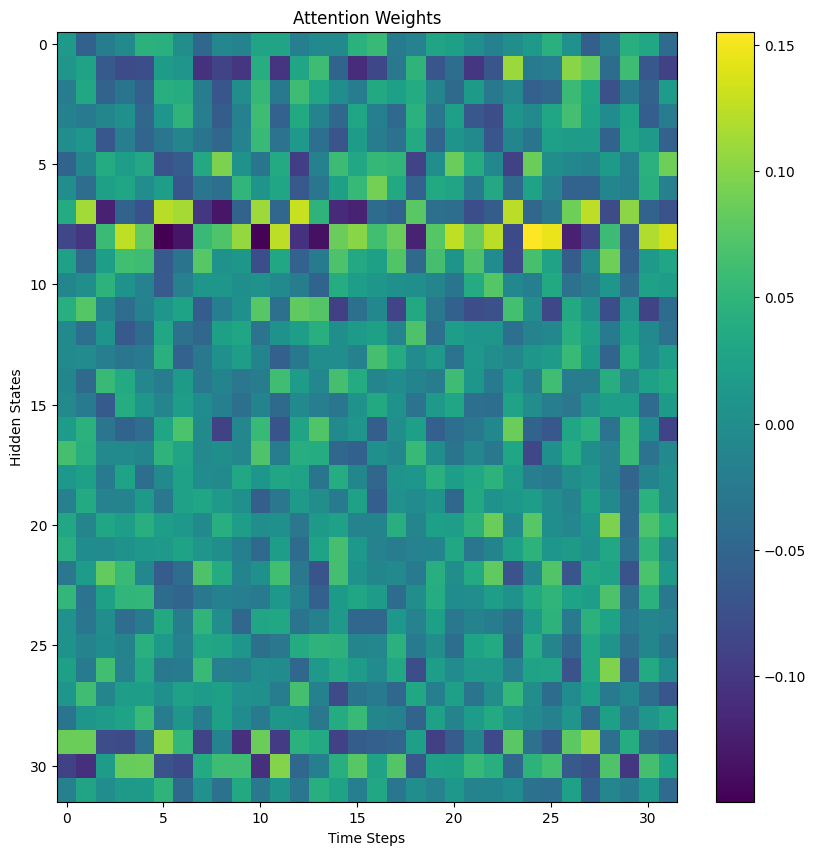

In [19]:
# Access the attention layer named 'attention_layer' (based on the model summary)
attention_layer_name = 'attention_layer'

# Access the attention layer by its name
attention_layer = attention_model.get_layer(attention_layer_name)

# Proceed to get the attention weights
attention_weights = attention_layer.get_weights()[0]

# Visualize the attention weights
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(attention_weights, cmap='viridis', aspect='auto')
plt.title('Attention Weights')
plt.xlabel('Time Steps')
plt.ylabel('Hidden States')
plt.colorbar()
plt.show()

In [20]:
attention_weights

array([[ 0.01413357, -0.05468139, -0.02161095, ...,  0.04147114,
         0.03295815, -0.04257136],
       [ 0.00922726,  0.02590523, -0.06293691, ...,  0.06096992,
        -0.06682593, -0.090224  ],
       [-0.02193675,  0.03315693, -0.052814  , ..., -0.02341064,
        -0.05202717,  0.0191839 ],
       ...,
       [ 0.08685465,  0.08607501, -0.07714911, ...,  0.03905118,
        -0.04468546, -0.05913616],
       [-0.08984665, -0.10696897,  0.01876741, ..., -0.10002024,
         0.0651428 ,  0.02717783],
       [-0.01706201,  0.02883875, -0.00060362, ..., -0.02261004,
         0.01243794, -0.04325589]], dtype=float32)

In [21]:
attention_layer

1/1 [==============================] - 0s 415ms/step
Shape of attention_weights: (1, 1, 32)


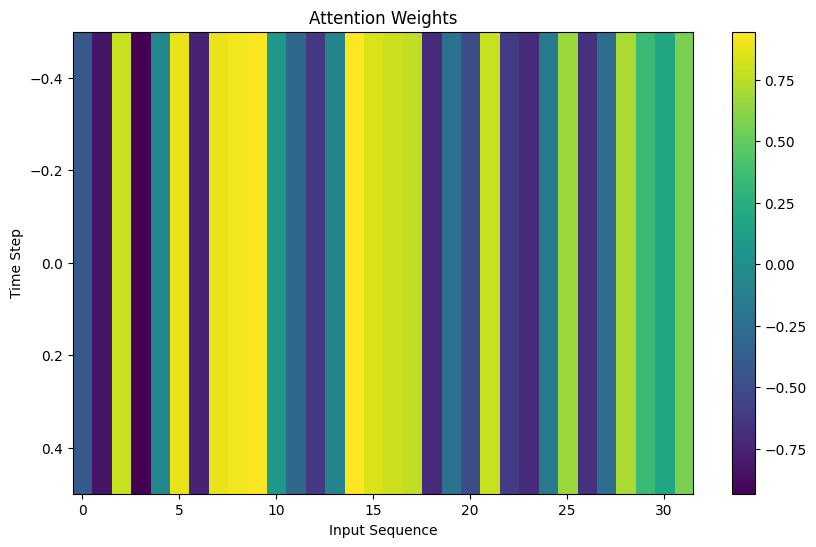

In [22]:
# Function to extract attention weights for a given input sequence
def get_attention_weights(model, input_sequence):
    # Create a sub-model that outputs attention weights
    attention_extractor = Model(inputs=model.input, outputs=model.get_layer('attention').output)
    
    # Get attention weights for the input sequence
    attention_weights = attention_extractor.predict(input_sequence)
    
    return attention_weights

# A specific example from our test data
example_index = 3

# Get attention weights for the chosen example
attention_weights = get_attention_weights(best_model, X_test[example_index].reshape(1, -1))

# Print the shape of attention_weights to understand its dimensions
print("Shape of attention_weights:", attention_weights.shape)

# Plot the heatmap to visualize attention weights
plt.figure(figsize=(10, 6))
plt.imshow(attention_weights[0], cmap='viridis', aspect='auto')  
plt.title('Attention Weights')
plt.xlabel('Input Sequence')
plt.ylabel('Time Step')
plt.colorbar()
plt.show()
